In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_excel("D:\online drives.xlsx")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
df['END_DATE']= df['END_DATE'].fillna(0)
df['CATEGORY']= df['CATEGORY'].fillna(0)
df['START']= df['START'].fillna(0)
df['STOP']= df['STOP'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1156 non-null   object 
 2   CATEGORY    1156 non-null   object 
 3   START       1156 non-null   object 
 4   STOP        1156 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df= df.rename(columns= {df.columns[0]:'startdate',df.columns[1]:'enddate', df.columns[2]:'category', df.columns[3]:'start', 
                        df.columns[4]:'stop', df.columns[5]:'miles', df.columns[6]:'purpose' })

In [8]:
df.head(5)

,startdate,enddate,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df=df[:-1]

Month Distribute: 1      81
2     105
3     104
4      62
5      56
6      99
7     105
8     127
9      52
10    117
11     96
12    151
Name: startdate, dtype: int64


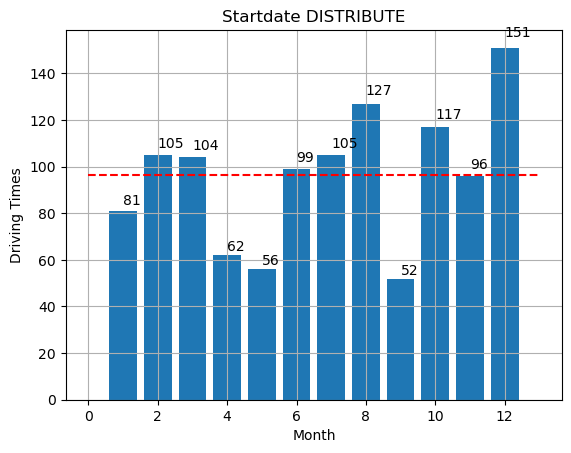

In [15]:
# By Month
import datetime
df["startdate"]=pd.to_datetime(df["startdate"])
sd_m_dis=df["startdate"].dt.month.value_counts()
sd_m_dis=sd_m_dis.sort_index()
sd_m_mean=sd_m_dis.mean()
print("Month Distribute:",sd_m_dis)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
rects=plt.bar(sd_m_dis.index,sd_m_dis.values)
plt.plot([0,len(sd_m_dis.index)+1],[sd_m_mean,sd_m_mean],"r--")
plt.title("Startdate DISTRIBUTE")
plt.xlabel("Month")
plt.ylabel("Driving Times")
plt.grid()
autolabel(rects)
plt.savefig("./sd_m_dis_fig")

Hours Distribute: 0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
Name: startdate, dtype: int64


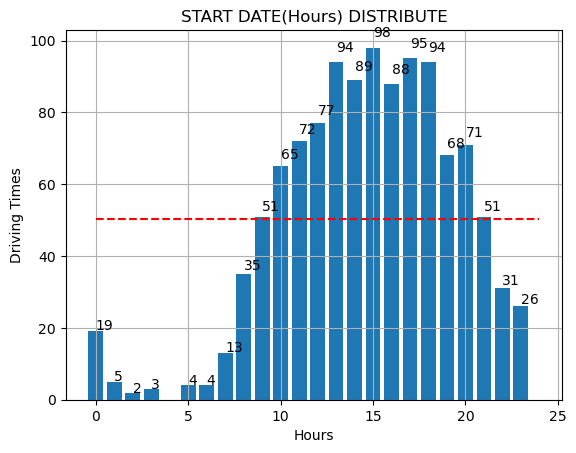

In [17]:
# By Hour
sd_h_dis=df["startdate"].dt.hour.value_counts()
sd_h_dis=sd_h_dis.sort_index()
print("Hours Distribute:",sd_h_dis)
sd_h_mean=sd_h_dis.mean()
rects=plt.bar(sd_h_dis.index,sd_h_dis.values)
plt.plot([0,len(sd_h_dis.index)+1],[sd_h_mean,sd_h_mean],"r--")
plt.title("START DATE(Hours) DISTRIBUTE")
plt.xlabel("Hours")
plt.ylabel("Driving Times")
plt.grid()
autolabel(rects)
plt.savefig("./sd_h_dis_fig")

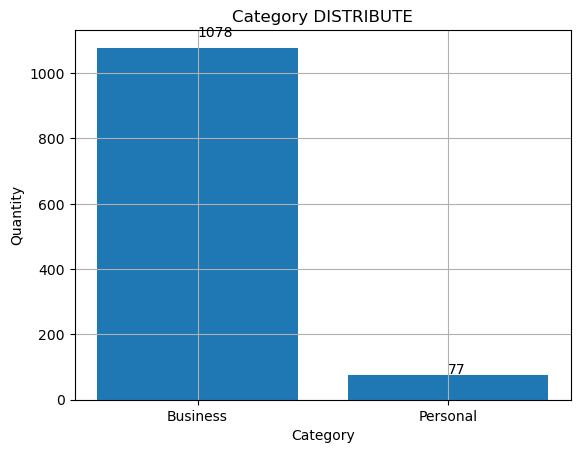

In [19]:
# Category
ct_dis=df["category"].value_counts()
rects=plt.bar(range(1,len(ct_dis.index)+1),ct_dis.values)
plt.title("Category DISTRIBUTE")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ct_dis.index)+1),ct_dis.index)
plt.grid()
autolabel(rects)
plt.savefig("./ct_dis_fig")

In [20]:
# Starting Place
st_dis=df["start"].value_counts()
st_dis.sort_values(inplace=True,ascending=False)
st_dis=st_dis.iloc[:10]
print("START PLACE:\n",st_dis)

START PLACE:
 Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: start, dtype: int64


In [21]:
# Stopping Place
stp_dis=df["stop"].value_counts()
stp_dis.sort_values(ascending=False)
stp_dis=stp_dis.iloc[:10]
print("STOP PLACE:\n",stp_dis)

STOP PLACE:
 Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: stop, dtype: int64


Miles:
 <=5      502
5-10     338
10-15    161
>20       83
15-20     71
dtype: int64


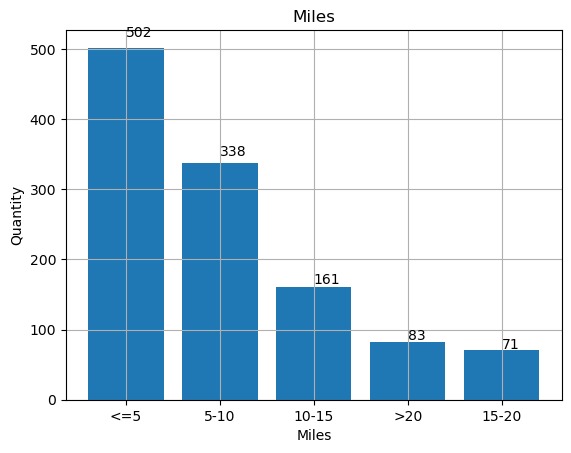

In [23]:
# Miles
ml_dis=df["miles"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)
print("Miles:\n",ml_dis)
rects=plt.bar(range(1,len(ml_dis.index)+1),ml_dis.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ml_dis.index)+1),ml_dis.index)
plt.grid()
autolabel(rects)
plt.savefig("./ml_dis_fig")

In [24]:
# Purpose
pp_dis=df["purpose"].value_counts()
pp_dis.sort_values(ascending=False)
pp_dis=pp_dis.iloc[:10]
print("PURPOSE:\n",pp_dis)

PURPOSE:
 Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64


In [26]:
# Association Analysis
#Relational Analysis：SSupport & Confidence
#Rebuild the df.
new_df=df.copy()
new_df["start"]=["START_"+str(s) for s in df["start"].values]
new_df["stop"]=["STOP_"+str(s) for s in df["stop"].values]
new_df["category"]=["CAT_"+str(s) for s in df["category"].values]
new_df["startmonth"]=["M_"+str(s) for s in df["startdate"].dt.month.values]
new_df["starthour"]=["H_"+str(s) for s in df["startdate"].dt.hour.values]
tsf_miles=[]
for mile in df["miles"].values:
    if mile < 5.0:
        tsf_miles.append("<5")
    elif mile < 10.0:
        tsf_miles.append("5-10")
    elif mile < 15.0:
        tsf_miles.append("10-15")
    elif mile < 20.0:
        tsf_miles.append("15-20")
    else:
        tsf_miles.append(">20")
new_df["milesrange"]=pd.Series(tsf_miles)
print(new_df["startdate"])
new_df.drop("startdate",axis=1,inplace=True)
new_df.drop("enddate",axis=1,inplace=True)
new_df.drop("miles",axis=1,inplace=True)
print(new_df)
print(new_df.shape)

0      2016-01-01 21:11:00
1      2016-02-01 01:25:00
2      2016-02-01 20:25:00
3      2016-05-01 17:31:00
4      2016-06-01 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: startdate, Length: 1155, dtype: datetime64[ns]
          category                   start                   stop  \
0     CAT_Business       START_Fort Pierce       STOP_Fort Pierce   
1     CAT_Business       START_Fort Pierce       STOP_Fort Pierce   
2     CAT_Business       START_Fort Pierce       STOP_Fort Pierce   
3     CAT_Business       START_Fort Pierce       STOP_Fort Pierce   
4     CAT_Business       START_Fort Pierce   STOP_West Palm Beach   
...            ...                     ...                    ...   
1150  CAT_Business           START_Kar?chi           STOP_Kar?chi   
1151  CAT_Business           START_Kar?chi  STOP_Unknown Location   
1152  CAT_Business  START_Unk

In [27]:
apr_itms=[]
for item in new_df.values:
    item=list(item)
    if str(item[3])=="nan":
        item.remove(item[3])
    if "Unknown" in item[2]:
        item.remove(item[2])
    if "Unknown" in item[1]:
        item.remove(item[1])
    apr_itms.append(item)

In [28]:
# Applied APRIORI Algorithm
#Support&Confidence
from itertools import combinations
def comb(lst):
    ret=[]
    for i in range(1,len(lst)+1):
        ret+=list(combinations(lst,i))
    return ret
class AprLayer(object):
    d=dict()
    def __init__(self):
        self.d=dict()
class AprNode(object):
    s=set()
    size=0
    num=0
    lnk_nodes=dict()
    def __init__(self,node):
        self.s=set(node)
        self.size=len(self.s)
        self.lnk_nodes=dict()
        self.num=0
    def __hash__(self):
        return hash("__".join(sorted([str(itm) for itm in list(self.s)])))
    def __eq__(self, other):  
        if "__".join(sorted([str(itm) for itm in list(self.s)]))=="__".join(sorted([str(itm) for itm in list(other.s)])):  
            return True  
        return False
    def isSubnode(self,node):
        return self.s.issubset(node.s)
    def incNum(self,num=1):
        self.num+=num
    def addLnk(self,node):
        self.lnk_nodes[node]=node.s

class AprBlk():
    apr_layers=dict()
    data_num=0
    def __init__(self,data):
        cnt=0
        self.data_num=len(data)
        for datum in data:
            cnt+=1
            datum=comb(datum)
            nodes=[AprNode(da) for da in datum]
            for node in nodes:
                if not node.size in self.apr_layers:
                    self.apr_layers[node.size]=AprLayer()
                if not node in self.apr_layers[node.size].d:
                    self.apr_layers[node.size].d[node]=node
                self.apr_layers[node.size].d[node].incNum()
            for node in nodes:
                if node.size==1:
                    continue
                for sn in node.s:
                    sub_n=AprNode(node.s-set([sn]))
                    self.apr_layers[node.size-1].d[sub_n].addLnk(node)
            #        
            #max_size=max(list(self.apr_layers.keys()))
            #for i in range(1,max_size):
            #    for subnode in self.apr_layers[i].d:
            #        for bignode in self.apr_layers[i+1].d:
            #            if subnode.isSubnode(bignode):
            #                subnode.addLnk(bignode)
    def getFreqItems(self,thd=10,hd=1):
        freq_items=[]
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num<thd:
                    continue
                freq_items.append((self.apr_layers[layer].d[node].s,self.apr_layers[layer].d[node].num))
        freq_items.sort(key=lambda x:x[1],reverse = True)
        return freq_items[:hd]
    def getLowConf(self,h_thd=10,l_thd=1,hd=1):
        low_confidence=[]
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num<h_thd:
                    continue
                for lnk_node in node.lnk_nodes:
                    if lnk_node.num<l_thd:
                        continue
                    conf=float(lnk_node.num)/float(node.num)
                    low_confidence.append([node.s,node.num,lnk_node.s,lnk_node.num,conf])
        low_confidence.sort(key=lambda x:x[4])
        return low_confidence[:hd]

[({'CAT_Business'}, 1078), ({'<5'}, 496), ({'<5', 'CAT_Business'}, 452), ({'5-10'}, 341), ({'5-10', 'CAT_Business'}, 326), ({'STOP_Cary'}, 203), ({'START_Cary'}, 201), ({'START_Cary', 'CAT_Business'}, 198), ({'STOP_Cary', 'CAT_Business'}, 197), ({'Meeting'}, 187), ({'Meeting', 'CAT_Business'}, 187), ({'10-15'}, 163), ({'Meal/Entertain'}, 160), ({'Meal/Entertain', 'CAT_Business'}, 160), ({'CAT_Business', '10-15'}, 155), ({'M_12'}, 151), ({'M_12', 'CAT_Business'}, 148), ({'Errand/Supplies'}, 128), ({'Errand/Supplies', 'CAT_Business'}, 128), ({'M_8'}, 127), ({'M_8', 'CAT_Business'}, 126), ({'M_10'}, 117), ({'M_10', 'CAT_Business'}, 117), ({'M_2'}, 105), ({'M_7'}, 105), ({'M_3'}, 104), ({'Customer Visit'}, 101), ({'Customer Visit', 'CAT_Business'}, 101), ({'M_6'}, 99), ({'<5', 'Errand/Supplies'}, 99)]


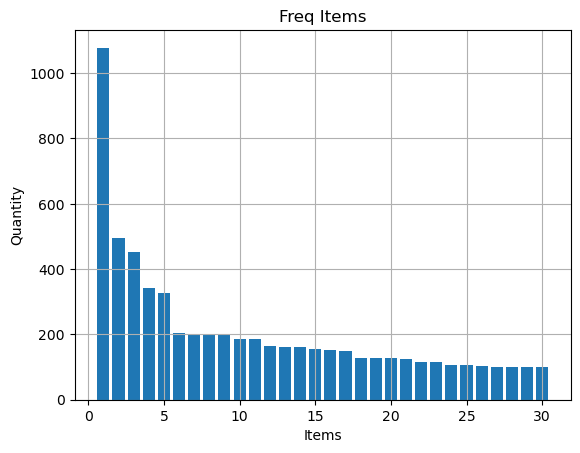

In [29]:
apr_blk=AprBlk(apr_itms)
freq_items=apr_blk.getFreqItems(thd=10,hd=30)
print(freq_items)
freq_x=["_".join(sorted(list(s[0]))) for s in freq_items]
freq_y=[s[1] for s in freq_items]
plt.bar(range(1,len(freq_items)+1),freq_y)
plt.title("Freq Items")
plt.xlabel("Items")
plt.ylabel("Quantity")
#plt.xticks(range(1,len(freq_x)+1),freq_x)
plt.grid()
#autolabel(rects)
plt.savefig("./ass_ana_fig")

In [30]:
print(apr_blk.getLowConf(h_thd=10,l_thd=10,hd=30))

[[{'CAT_Business'}, 1078, {'STOP_Midtown', 'CAT_Business'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'START_R?walpindi', 'CAT_Business'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'START_Emeryville', 'CAT_Business'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'CAT_Business', 'START_Kenner'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'STOP_New Orleans', 'CAT_Business'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'START_New Orleans', 'CAT_Business'}, 10, 0.00927643784786642], [{'CAT_Business'}, 1078, {'STOP_Westpark Place', 'CAT_Business'}, 12, 0.011131725417439703], [{'CAT_Business'}, 1078, {'H_7', 'CAT_Business'}, 12, 0.011131725417439703], [{'CAT_Business'}, 1078, {'CAT_Business', 'START_Midtown'}, 13, 0.012059369202226345], [{'CAT_Business'}, 1078, {'CAT_Business', 'STOP_R?walpindi'}, 13, 0.012059369202226345], [{'CAT_Business'}, 1078, {'START_Westpark Place', 'CAT_Business'}, 15, 0.013914656771799629], [{'CAT_Business'}, 1078, {'CAT_B

In [31]:
df["enddate"]=pd.to_datetime(df["enddate"])
speed=df["miles"]/((df["enddate"]-df["startdate"]).dt.seconds/60)
print(speed)

0       0.850000
1       0.416667
2       0.369231
3       0.335714
4       0.950746
          ...   
1150    0.100000
1151    0.216667
1152    0.462857
1153    0.355556
1154    0.467961
Length: 1155, dtype: float64


               startdate             enddate  category             start  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-02-01 01:25:00 2016-02-01 01:37:00  Business       Fort Pierce   
2    2016-02-01 20:25:00 2016-02-01 20:38:00  Business       Fort Pierce   
3    2016-05-01 17:31:00 2016-05-01 17:45:00  Business       Fort Pierce   
4    2016-06-01 14:42:00 2016-06-01 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                  stop  miles          purpose     speed  starthour  
0          Fort P

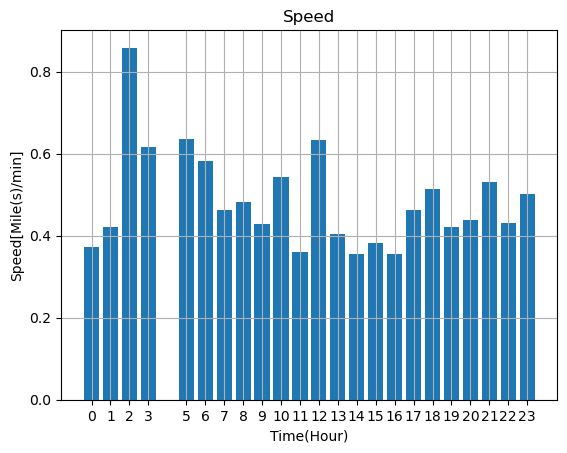

In [33]:
df["speed"]=speed
df["starthour"]=df["startdate"].dt.hour
print(df[df["speed"]!=np.inf])
spd_df=df[df["speed"]!=np.inf].groupby(["starthour"])["speed"].mean()
print(spd_df)

#rects=plt.bar(range(0,len(spd_df.index)),spd_df.values)
rects=plt.bar(spd_df.index,spd_df.values)
plt.title("Speed")
plt.xlabel("Time(Hour)")
plt.ylabel("Speed[Mile(s)/min]")
plt.xticks(spd_df.index)
plt.grid()
plt.savefig("./speed_fig")